#                                                  Customer Churn

### 1) Introduction of the business problem

#### a) Defining problem statement

An E Commerce company provider is facing a lot of competition in the current market and it has become a challenge to retain the existing customers in the current situation. Hence, the company wants to develop a model through which they can do churn prediction of the accounts and provide segmented offers to the potential churners. In this company, account churn is a major thing because 1 account can have multiple customers. hence by losing one account the company might be losing more than one customer.

#### b) Need of the study/project

In order to prevent customers/account churn, we need to develop a churn prediction model that prevents customers from leaving the company.<br/><br/>
    Our study will cover key patterns and observations which makes a customer leave the company. And we should be able to make recommendations helping company ahead of their competitor.

#### c) Understanding business/social opportunity

Customers have built a habit of purchasing item with ease, and they quickly order from most used E commerce platform by them instead of finding the same product on other platforms for small profits. <br/><br/>
	E commerce companies have been steadily eating up the worldwide retail market sales, so company with lesser churn rate would grow fast.


### 2) Data Report

#### a) Understanding how data was collected in terms of time, frequency and methodology

##### Loading basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Disabling Warning
import warnings
warnings.simplefilter('ignore')

##### Reading Data & Displaying top 5

In [3]:
ccdf = pd.read_excel("Customer Churn Data.xlsx", sheet_name = "Data for DSBA")

In [4]:
ccdf.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


#### b) Visual inspection of data (rows, columns, descriptive details)

##### Data Stats

In [5]:
# Shape
ccdf.shape

(11260, 19)

In [6]:
# NULLs in Data
ccdf.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [7]:
# Duplicates in Data
ccdf.duplicated().sum()

0

##### Data describe

In [8]:
ccdf.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
AccountID,11260.0,NaN,NaN,NaN,25629.5,3250.62635,20000.0,22814.75,25629.5,28444.25,31259.0
Churn,11260.0,NaN,NaN,NaN,0.168384,0.374223,0.0,0.0,0.0,0.0,1.0
Tenure,11158.0,38.0,1.0,1351.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City_Tier,11148.0,NaN,NaN,NaN,1.653929,0.915015,1.0,1.0,1.0,3.0,3.0
CC_Contacted_LY,11158.0,NaN,NaN,NaN,17.867091,8.853269,4.0,11.0,16.0,23.0,132.0
Payment,11151,5,Debit Card,4587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,11152,4,Male,6328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Service_Score,11162.0,NaN,NaN,NaN,2.902526,0.725584,0.0,2.0,3.0,3.0,5.0
Account_user_count,11148.0,7.0,4.0,4569.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
account_segment,11163,7,Super,4062,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### c) Understanding of attributes (variable info, renaming if required)

In [9]:
# Data Info
ccdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [10]:
# Renaming field names
ccdf.columns = ['AccountID','Churn','Tenure','City_Tier','CC_Contacted_L12m','Payment','Gender','Service_Score','Account_user_count','account_segment','CC_Agent_Score','Marital_Status','rev_per_month','Complain_l12m','rev_growth_yoy','coupon_used_l12m','Day_Since_CC_connect','cashback_l12m','Login_device']

### 3) Exploratory data analysis

#### a) Univariate analysis (distribution and spread for every continuous attribute, distribution of data in categories for categorical ones)

In [11]:
# Removing Un-Necessary Column(s)
ccdf.drop('AccountID', axis = 1, inplace = True)

In [12]:
# Numerical and Categorical Columns

num_cols = ccdf.select_dtypes(include = ['int64','float64']).columns
cat_cols = ccdf.select_dtypes(include = ['object']).columns

#### Univariate analysis

In [13]:
# Variable number of value counts

print('***** Numerical Variables *****')

for i in range(0, len(num_cols)):
    print(num_cols[i], ccdf[num_cols[i]].value_counts().count())

print('***** Categorical Variables *****')
    
for i in range(0, len(cat_cols)):
    print(cat_cols[i], ccdf[cat_cols[i]].value_counts().count())

***** Numerical Variables *****
Churn 2
City_Tier 3
CC_Contacted_L12m 44
Service_Score 6
CC_Agent_Score 5
Complain_l12m 2
***** Categorical Variables *****
Tenure 38
Payment 5
Gender 4
Account_user_count 7
account_segment 7
Marital_Status 3
rev_per_month 59
rev_growth_yoy 20
coupon_used_l12m 20
Day_Since_CC_connect 24
cashback_l12m 5693
Login_device 3


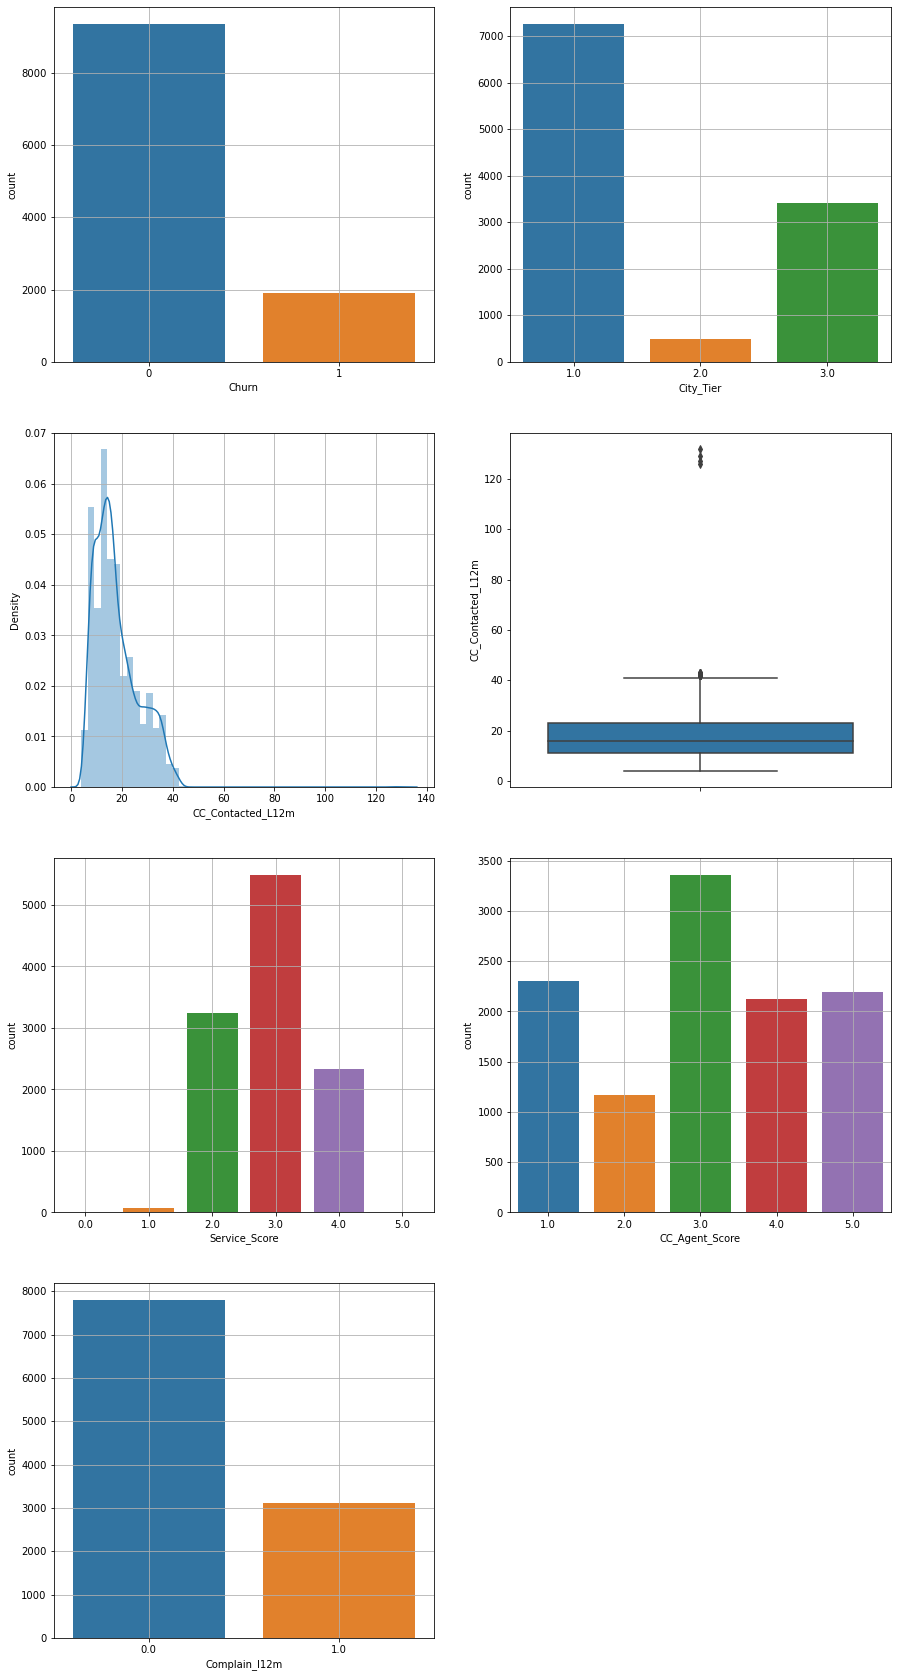

In [14]:
i = 1
plt.figure(figsize = (15,30))

for col in num_cols:
    if(col == 'CC_Contacted_L12m'):
        plt.subplot(4,2,i)
        sns.distplot(x = ccdf[col], axlabel = col);
        plt.grid();
        
        i = i+1
    
        plt.subplot(4,2,i)
        sns.boxplot(y = ccdf[col]);
    else:
        plt.subplot(4,2,i)
        sns.countplot(x=col, data = ccdf);
        plt.grid();
        
    i = i+1

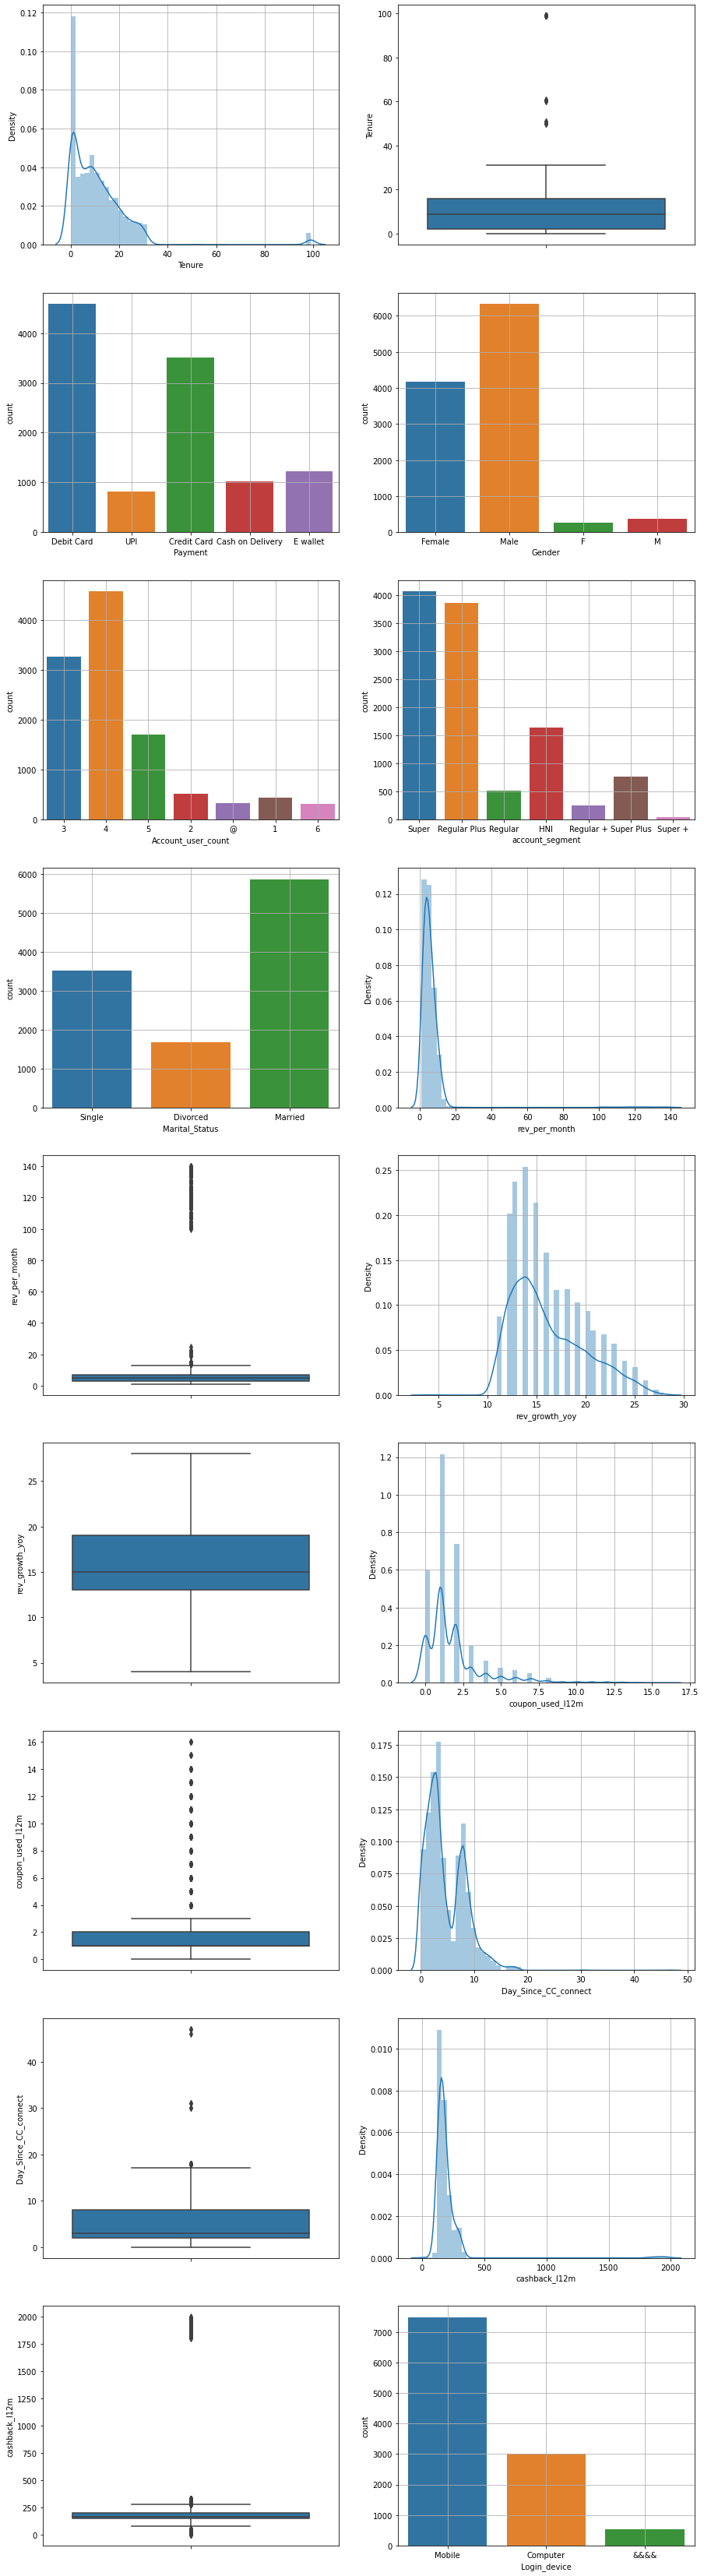

In [15]:
i = 1
plt.figure(figsize = (15,60))

# Categorical variables with more distinct values
cat_dcols = ['Tenure', 'rev_per_month', 'rev_growth_yoy' ,'coupon_used_l12m', 'Day_Since_CC_connect', 'cashback_l12m']

for col in cat_cols:
    if(col in cat_dcols):
        plt.subplot(9,2,i)
        sns.distplot(x = pd.to_numeric(ccdf[col], errors='coerce') , axlabel = col);
        plt.grid();
        
        i = i+1
    
        plt.subplot(9,2,i)
        sns.boxplot(y = pd.to_numeric(ccdf[col], errors='coerce'));
    else:
        plt.subplot(9,2,i)
        sns.countplot(x=col, data = ccdf);
        plt.grid();
        
    i = i+1

In [16]:
# Distinct values and their weightage

dval_cols = ['Churn','City_Tier','Service_Score','CC_Agent_Score','Complain_l12m','Payment','Gender','Account_user_count','account_segment','Marital_Status','Login_device']

for col in dval_cols:
    print("****{0}****\n{1}\n-- % Weightage --\n{2}".format(col, ccdf[col].value_counts(), ccdf[col].value_counts(normalize = True)));

****Churn****
0    9364
1    1896
Name: Churn, dtype: int64
-- % Weightage --
0    0.831616
1    0.168384
Name: Churn, dtype: float64
****City_Tier****
1.0    7263
3.0    3405
2.0     480
Name: City_Tier, dtype: int64
-- % Weightage --
1.0    0.651507
3.0    0.305436
2.0    0.043057
Name: City_Tier, dtype: float64
****Service_Score****
3.0    5490
2.0    3251
4.0    2331
1.0      77
0.0       8
5.0       5
Name: Service_Score, dtype: int64
-- % Weightage --
3.0    0.491847
2.0    0.291256
4.0    0.208834
1.0    0.006898
0.0    0.000717
5.0    0.000448
Name: Service_Score, dtype: float64
****CC_Agent_Score****
3.0    3360
1.0    2302
5.0    2191
4.0    2127
2.0    1164
Name: CC_Agent_Score, dtype: int64
-- % Weightage --
3.0    0.301508
1.0    0.206569
5.0    0.196608
4.0    0.190865
2.0    0.104451
Name: CC_Agent_Score, dtype: float64
****Complain_l12m****
0.0    7792
1.0    3111
Name: Complain_l12m, dtype: int64
-- % Weightage --
0.0    0.714666
1.0    0.285334
Name: Complain_l12m, dt

#### b) Bivariate analysis (relationship between different variables , correlations)

#### Bi-Variate Analysis

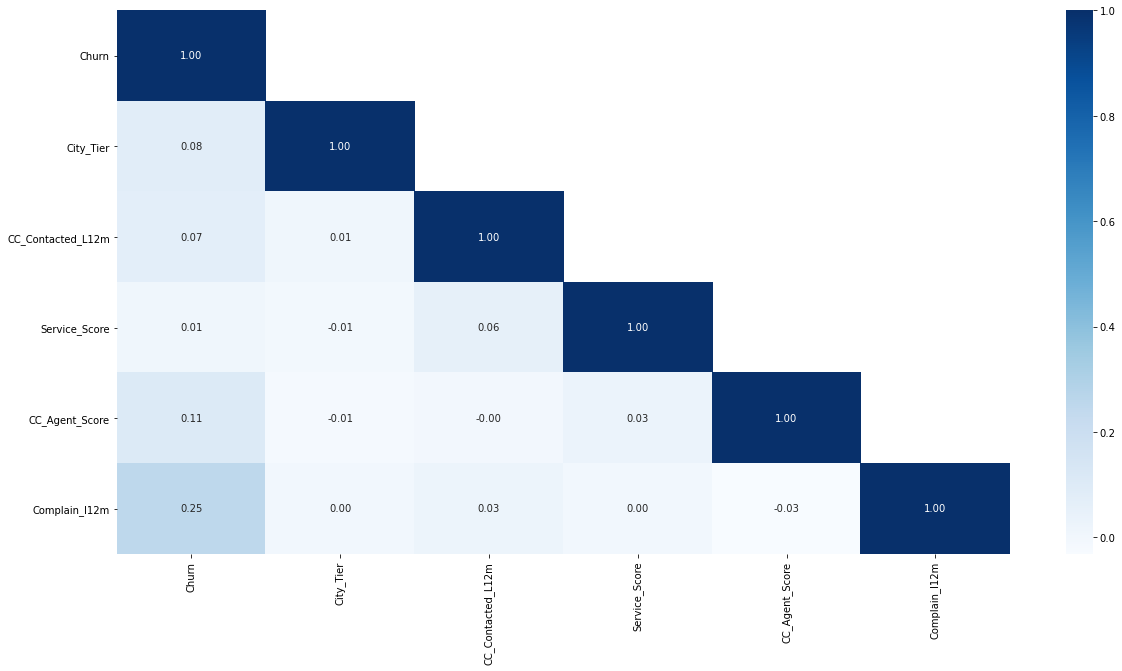

In [17]:
# Correlation Plot

corr = ccdf.corr()

plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, fmt = '.2f', mask = np.triu(corr,+1), cmap='Blues')
plt.xticks(rotation = 90);

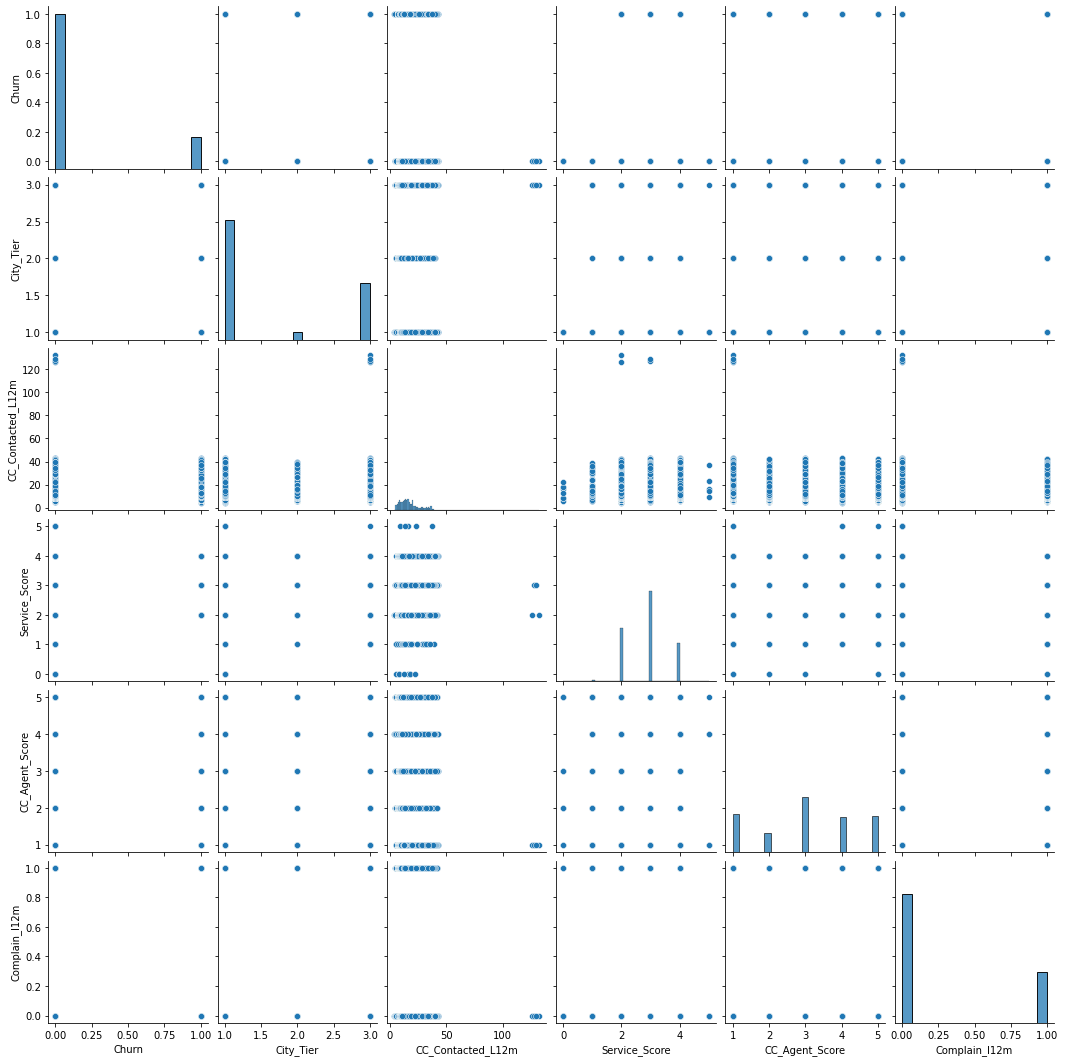

In [18]:
# Pair plot
sns.pairplot(data = ccdf);

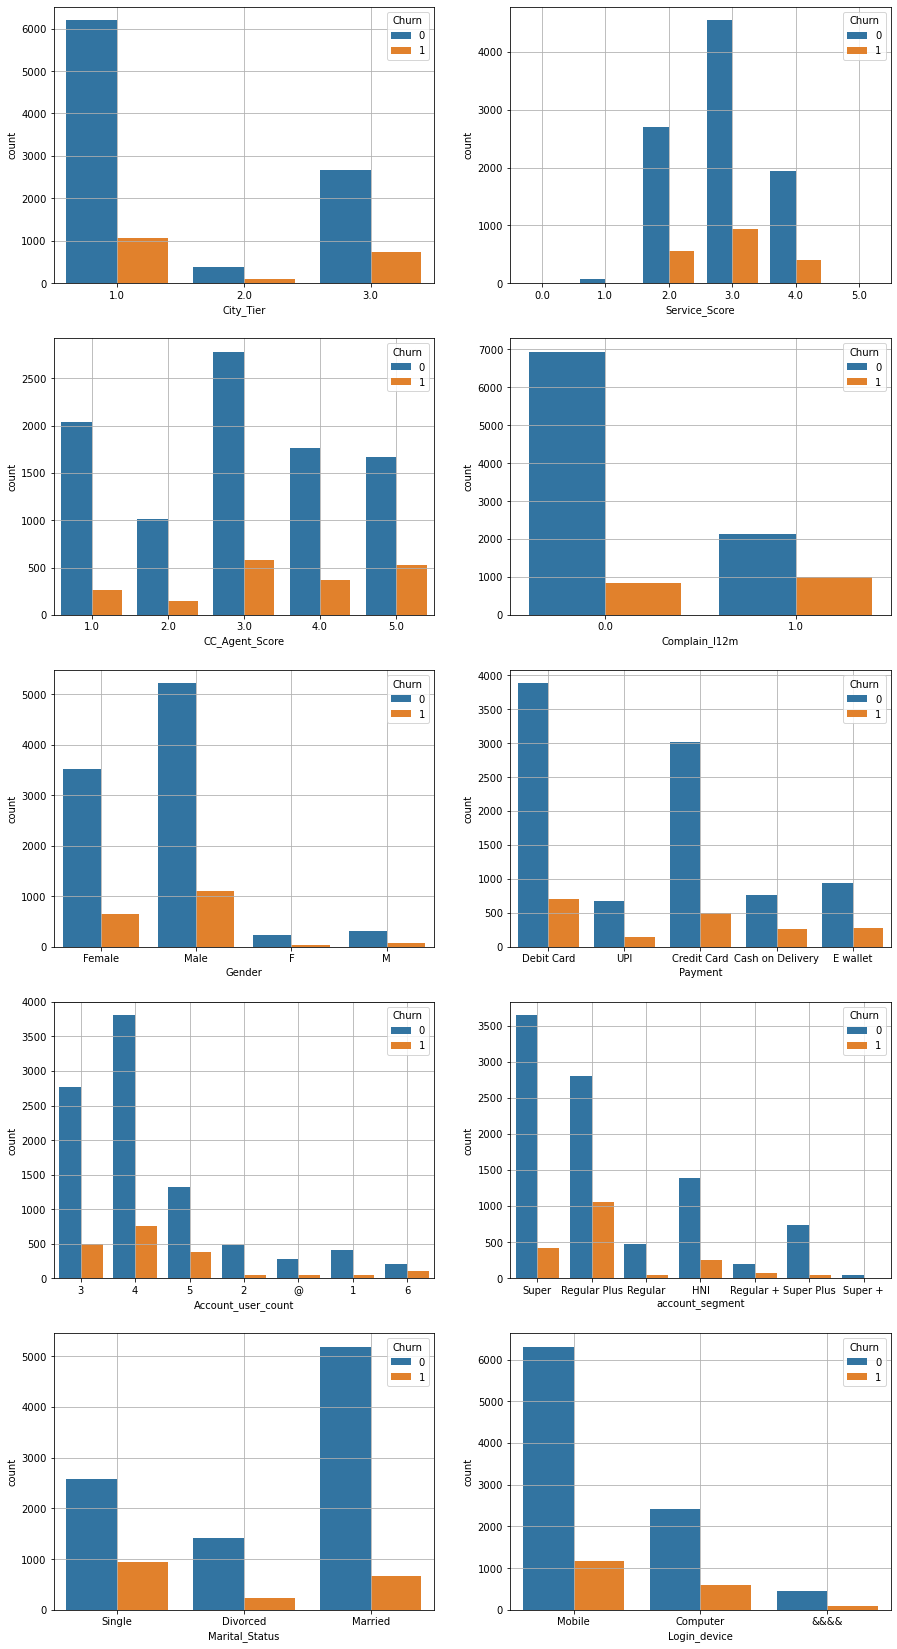

In [19]:
## Bi - Variate count plot

cat_cols = ['City_Tier', 'Service_Score', 'CC_Agent_Score','Complain_l12m', 'Gender', 'Payment', 'Account_user_count', 'account_segment', 'Marital_Status','Login_device']

i = 1
plt.figure(figsize = (15,60))
for col in cat_cols:
    plt.subplot(10,2,i)
    sns.countplot(x=col, hue = 'Churn', data = ccdf);
    plt.grid();
    i = i+1

#### a) Removal of unwanted variables (if applicable)

In [20]:
## Removing Un-Necessary Column(s)
# ccdf.drop('AccountID', axis = 1, inplace = True)

#### b) Missing Value treatment (if applicable)

In [21]:
ccdf.isna().sum()

Churn                     0
Tenure                  102
City_Tier               112
CC_Contacted_L12m       102
Payment                 109
Gender                  108
Service_Score            98
Account_user_count      112
account_segment          97
CC_Agent_Score          116
Marital_Status          212
rev_per_month           102
Complain_l12m           357
rev_growth_yoy            0
coupon_used_l12m          0
Day_Since_CC_connect    357
cashback_l12m           471
Login_device            221
dtype: int64

In [22]:
ccdf.isna().sum()/11260

Churn                   0.000000
Tenure                  0.009059
City_Tier               0.009947
CC_Contacted_L12m       0.009059
Payment                 0.009680
Gender                  0.009591
Service_Score           0.008703
Account_user_count      0.009947
account_segment         0.008615
CC_Agent_Score          0.010302
Marital_Status          0.018828
rev_per_month           0.009059
Complain_l12m           0.031705
rev_growth_yoy          0.000000
coupon_used_l12m        0.000000
Day_Since_CC_connect    0.031705
cashback_l12m           0.041829
Login_device            0.019627
dtype: float64

In [23]:
categorical = ['Churn','City_Tier','Service_Score','CC_Agent_Score','Complain_l12m','Payment','Gender','Account_user_count','account_segment','Marital_Status','Login_device']
numerical = ['CC_Contacted_L12m','Tenure','rev_per_month','rev_growth_yoy','coupon_used_l12m','Day_Since_CC_connect','cashback_l12m']

In [24]:
# Replacing NULLs with MODE in Categorical values
for col in categorical:
    ccdf[col] = np.where(ccdf[col].isnull(), ccdf[col].mode()[0], ccdf[col])

In [25]:
# Replacing NULLs with MEDIAN in numerical values
for col in numerical:
    ccdf[col] = pd.to_numeric(ccdf[col], errors='coerce')
    ccdf[col] = np.where(ccdf[col].isnull(), ccdf[col].median(), ccdf[col])

In [26]:
## Invalid values fix

# Gender
ccdf['Gender'] = ccdf['Gender'].replace({'M':'Male','F':'Female'});

# Account user count
ccdf['Account_user_count'] = ccdf['Account_user_count'].replace({'@':ccdf[ccdf['Account_user_count']!='@']['Account_user_count'].median()})

# Account Segment
ccdf['account_segment'] = ccdf['account_segment'].replace({'Regular +':'Regular Plus', 'Super +':'Super Plus'})

# Login device
ccdf['Login_device'] = ccdf['Login_device'].replace({'&&&&':ccdf['Login_device'].mode()[0]})

#### d) Outlier treatment (if required)

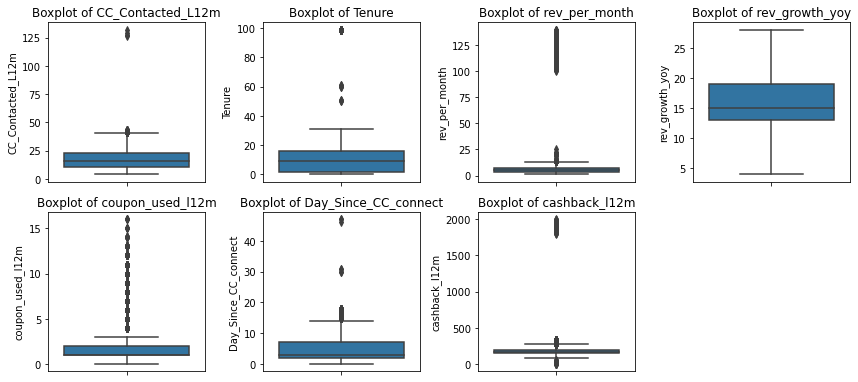

In [27]:
plt.figure(figsize = (12,8))

for i in range(len(numerical)):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y = ccdf[numerical[i]], data = ccdf)
    plt.title('Boxplot of {}'.format(numerical[i]))
    plt.tight_layout()

In [28]:
# Outlier detection

def outlier_values(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    LL= Q1-(1.5 * IQR)
    UL= Q3+(1.5 * IQR)
    return LL, UL 

In [29]:
for i in numerical:
    ll,ul = outlier_values(ccdf[i])
    oc = ccdf[(ccdf[i]<ll) | (ccdf[i]>ul)][i].count()
    total = ccdf[i].count()
    print("{0}\t{1}\t{2}".format(i,oc,oc/total))

CC_Contacted_L12m	42	0.0037300177619893427
Tenure	139	0.012344582593250443
rev_per_month	185	0.016429840142095916
rev_growth_yoy	0	0.0
coupon_used_l12m	1380	0.12255772646536411
Day_Since_CC_connect	130	0.011545293072824156
cashback_l12m	986	0.08756660746003553


In [30]:
# CC_Contacted_L12m
ll, ul = outlier_values(ccdf['CC_Contacted_L12m'])
ccdf['CC_Contacted_L12m']=np.where(ccdf['CC_Contacted_L12m'] > ul, ul, ccdf['CC_Contacted_L12m'])
ccdf['CC_Contacted_L12m']=np.where(ccdf['CC_Contacted_L12m'] < ll, ll, ccdf['CC_Contacted_L12m'])

# Tenure
ll, ul = outlier_values(ccdf['Tenure'])
ccdf['Tenure']=np.where(ccdf['Tenure'] > ul, ul, ccdf['Tenure'])
ccdf['Tenure']=np.where(ccdf['Tenure'] < ll, ll, ccdf['Tenure'])

# rev_per_month
ll, ul = outlier_values(ccdf['rev_per_month'])
ccdf['rev_per_month']=np.where(ccdf['rev_per_month'] > ul, ul, ccdf['rev_per_month'])
ccdf['rev_per_month']=np.where(ccdf['rev_per_month'] < ll, ll, ccdf['rev_per_month'])

# Day_Since_CC_connect
ll, ul = outlier_values(ccdf['Day_Since_CC_connect'])
ccdf['Day_Since_CC_connect']=np.where(ccdf['Day_Since_CC_connect'] > ul, ul, ccdf['Day_Since_CC_connect'])
ccdf['Day_Since_CC_connect']=np.where(ccdf['Day_Since_CC_connect'] < ll, ll, ccdf['Day_Since_CC_connect'])

# cashback_l12m
ll, ul = outlier_values(ccdf['cashback_l12m'])
ccdf['cashback_l12m']=np.where(ccdf['cashback_l12m'] > ul, ul, ccdf['cashback_l12m'])
ccdf['cashback_l12m']=np.where(ccdf['cashback_l12m'] < ll, ll, ccdf['cashback_l12m'])

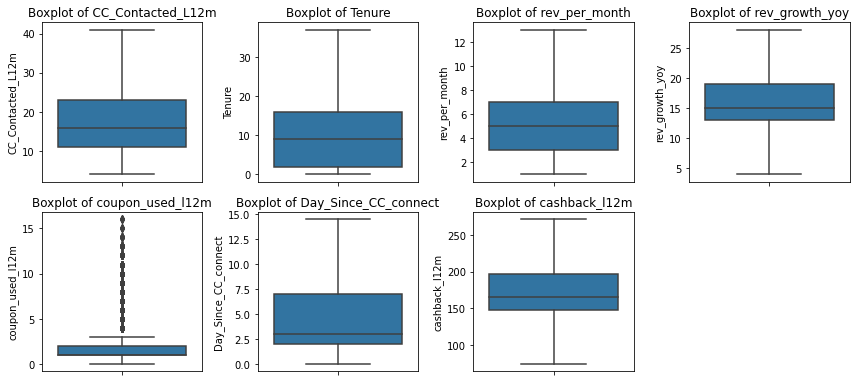

In [31]:
plt.figure(figsize = (12,8))

for i in range(len(numerical)):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y = ccdf[numerical[i]], data = ccdf)
    plt.title('Boxplot of {}'.format(numerical[i]))
    plt.tight_layout()

In [32]:
ccdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Churn                 11260 non-null  int64  
 1   Tenure                11260 non-null  float64
 2   City_Tier             11260 non-null  float64
 3   CC_Contacted_L12m     11260 non-null  float64
 4   Payment               11260 non-null  object 
 5   Gender                11260 non-null  object 
 6   Service_Score         11260 non-null  float64
 7   Account_user_count    11260 non-null  float64
 8   account_segment       11260 non-null  object 
 9   CC_Agent_Score        11260 non-null  float64
 10  Marital_Status        11260 non-null  object 
 11  rev_per_month         11260 non-null  float64
 12  Complain_l12m         11260 non-null  float64
 13  rev_growth_yoy        11260 non-null  float64
 14  coupon_used_l12m      11260 non-null  float64
 15  Day_Since_CC_connec

#### e) Variable transformation (if applicable)

In [33]:
# ***** Numeric to Categorical *****

ccdf['Churn'] = ccdf['Churn'].astype('object')
ccdf['City_Tier'] = ccdf['City_Tier'].astype('object')
ccdf['Service_Score'] = ccdf['Service_Score'].astype('object')
ccdf['CC_Agent_Score'] = ccdf['CC_Agent_Score'].astype('object')
ccdf['Complain_l12m'] = ccdf['Complain_l12m'].astype('object')

In [34]:
ccdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Churn                 11260 non-null  object 
 1   Tenure                11260 non-null  float64
 2   City_Tier             11260 non-null  object 
 3   CC_Contacted_L12m     11260 non-null  float64
 4   Payment               11260 non-null  object 
 5   Gender                11260 non-null  object 
 6   Service_Score         11260 non-null  object 
 7   Account_user_count    11260 non-null  float64
 8   account_segment       11260 non-null  object 
 9   CC_Agent_Score        11260 non-null  object 
 10  Marital_Status        11260 non-null  object 
 11  rev_per_month         11260 non-null  float64
 12  Complain_l12m         11260 non-null  object 
 13  rev_growth_yoy        11260 non-null  float64
 14  coupon_used_l12m      11260 non-null  float64
 15  Day_Since_CC_connec

#### f) Addition of new variables (if required)

In [35]:
ccdf_encode = pd.get_dummies(ccdf[['Login_device','Gender']], drop_first = True)

In [36]:
ccdf.drop(['Login_device','Gender'], axis = 1, inplace = True)
ccdf = ccdf.join(ccdf_encode)

ccdf.head()

,Churn,Tenure,City_Tier,CC_Contacted_L12m,Payment,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_l12m,rev_growth_yoy,coupon_used_l12m,Day_Since_CC_connect,cashback_l12m,Login_device_Mobile,Gender_Male
0,1,4.0,3.0,6.0,Debit Card,3.0,3.0,Super,2.0,Single,9.0,1.0,11.0,1.0,5.0,159.93,1,0
1,1,0.0,1.0,8.0,UPI,3.0,4.0,Regular Plus,3.0,Single,7.0,1.0,15.0,0.0,0.0,120.90,1,1
2,1,0.0,1.0,30.0,Debit Card,2.0,4.0,Regular Plus,3.0,Single,6.0,1.0,14.0,0.0,3.0,165.25,1,1
3,1,0.0,3.0,15.0,Debit Card,2.0,4.0,Super,5.0,Single,8.0,0.0,23.0,0.0,3.0,134.07,1,1
4,1,0.0,1.0,12.0,Credit Card,2.0,3.0,Regular Plus,5.0,Single,3.0,0.0,11.0,1.0,3.0,129.60,1,1


In [37]:
ccdf['Login_device_Mobile'] = ccdf['Login_device_Mobile'].astype('object')
ccdf['Gender_Male'] = ccdf['Gender_Male'].astype('object')

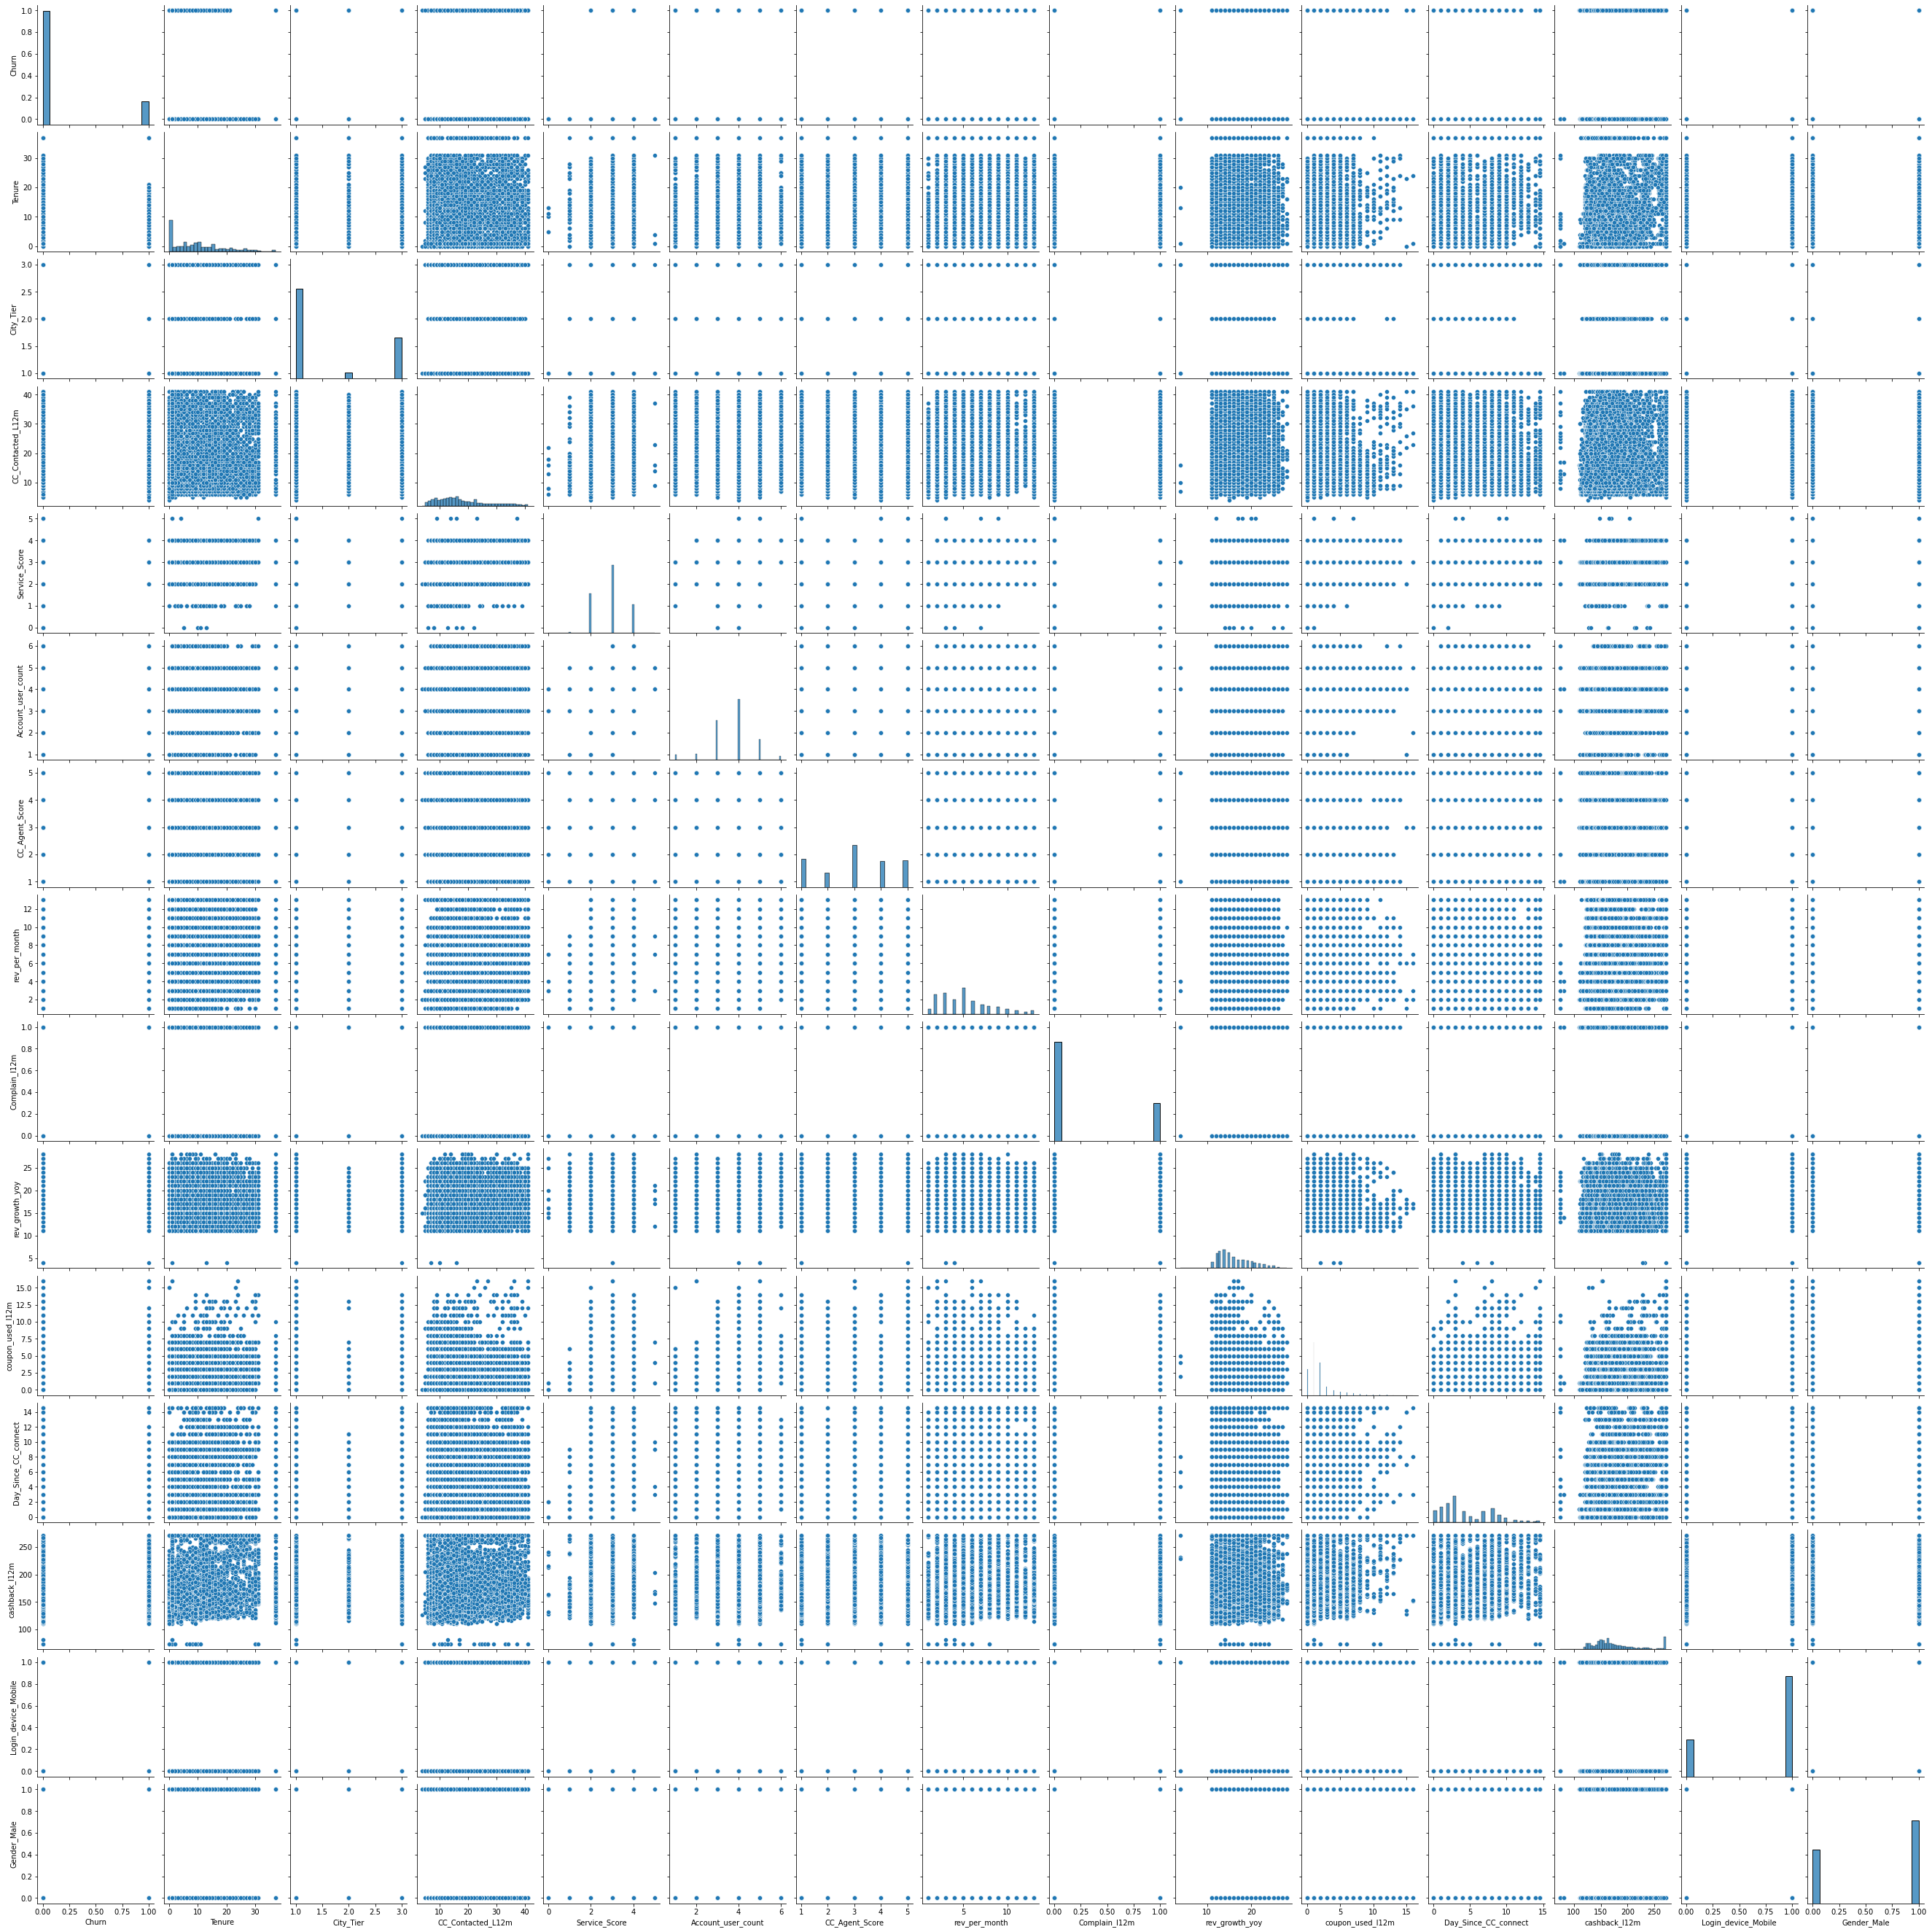

In [38]:
# Pair plot
sns.pairplot(data = ccdf);

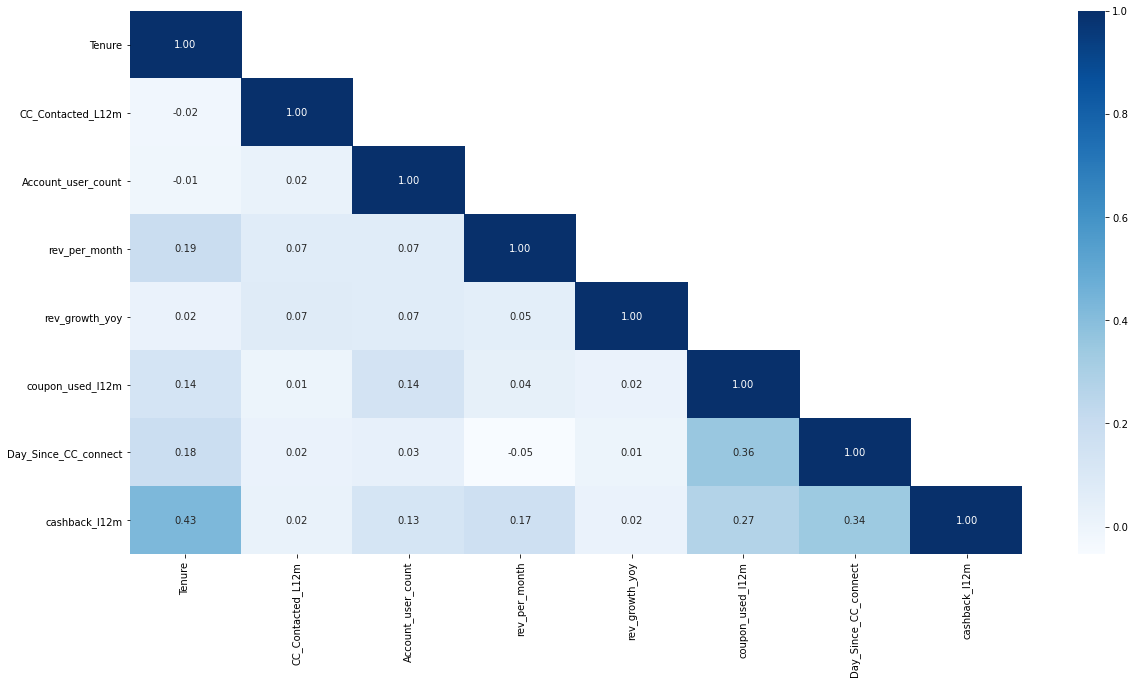

In [39]:
# Correlation Plot

corr = ccdf.corr()

plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, fmt = '.2f', mask = np.triu(corr,+1), cmap='Blues')
plt.xticks(rotation = 90);

### Business insights from EDA 

#### a) Is the data unbalanced? If so, what can be done? Please explain in the context of the business

In [40]:
ccdf['Churn'].value_counts(normalize = True)

0    0.831616
1    0.168384
Name: Churn, dtype: float64

#### b) Any business insights using clustering

In [41]:
pdtable = pd.pivot_table(ccdf, index =['Churn'], aggfunc = np.mean)
pdtable

,Account_user_count,CC_Contacted_L12m,Day_Since_CC_connect,Tenure,cashback_l12m,coupon_used_l12m,rev_growth_yoy,rev_per_month
Churn,,,,,,,,
0,3.657732,17.524669,4.788659,11.585861,180.184469,1.803503,16.216467,5.198953
1,3.938291,19.248945,3.349156,3.660865,162.960654,1.725738,16.077532,5.506857


In [42]:
pdtable = pd.pivot_table(ccdf, index =['account_segment','Churn'], aggfunc = np.mean)
pdtable

Account_user_count  CC_Contacted_L12m  \
account_segment Churn                                          
HNI             0                3.763006          17.823699   
                1                3.945098          21.545098   
Regular         0                3.775000          15.260417   
                1                4.300000          12.950000   
Regular Plus    0                3.597264          16.811144   
                1                3.944099          18.118012   
Super           0                3.664430          18.032752   
                1                3.963134          21.288018   
Super Plus      0                3.598972          18.705656   
                1                3.100000          20.650000   

                       Day_Since_CC_connect     Tenure  cashback_l12m  \
account_segment Churn                                                   
HNI             0                  6.041185  13.423410     211.321481   
                1                  5.476471   6.615686     205.954941   
Regular         0                  7.111458  20.456250     266.794188   
                1                  8.125000  15.400000     271.440000   
Regular Plus    0                  3.212880   8.025025     144.761195   
                1                  2.410382   2.418811     142.908713   
Super           0                  4.984295  10.648591     169.789393   
                1                  3.686636   3.658986     172.140576   
Super Plus      0                  6.260925  21.048843     257.586684   
                1                  7.800000   8.100000     245.754000   

                       coupon_used_l12m  rev_growth_yoy  rev_per_month  
account_segment Churn                                                   
HNI             0              2.328757       16.432081       5.441474  
                1              2.376471       15.129412       5.862745  
Regular         0              2.352083       15.458333       5.779167  
                1              3.800000       14.575000       5.700000  
Regular Plus    0              1.354021       16.297965       4.706039  
                1              1.423248       16.306122       5.103815  
Super           0              1.646711       16.125906       5.300134  
                1              1.700461       16.331797       6.138249  
Super Plus      0              3.012853       16.420308       5.823907  
                1              4.300000       14.425000       7.550000

In [43]:
pdtable = pd.pivot_table(ccdf, index =['Payment','Churn'], aggfunc = np.mean)
pdtable

Account_user_count  CC_Contacted_L12m  \
Payment          Churn                                          
Cash on Delivery 0                3.664474          17.953947   
                 1                3.944882          16.633858   
Credit Card      0                3.624502          17.707171   
                 1                3.977956          19.741483   
Debit Card       0                3.656848          17.304632   
                 1                3.900552          18.770718   
E wallet         0                3.716259          18.034006   
                 1                3.989130          20.927536   
UPI              0                3.721649          16.815906   
                 1                3.881119          21.356643   

                        Day_Since_CC_connect     Tenure  cashback_l12m  \
Payment          Churn                                                   
Cash on Delivery 0                  5.006579  11.742105     175.530368   
                 1                  3.547244   3.547244     156.902795   
Credit Card      0                  4.645750  11.558433     179.878778   
                 1                  3.382766   3.539078     162.451383   
Debit Card       0                  4.752518  11.569486     179.752294   
                 1                  3.388122   3.955801     162.032818   
E wallet         0                  5.346440  12.381509     187.949182   
                 1                  3.362319   4.442029     178.487065   
UPI              0                  4.617084  10.525773     178.517113   
                 1                  2.657343   1.286713     150.228392   

                        coupon_used_l12m  rev_growth_yoy  rev_per_month  
Payment          Churn                                                   
Cash on Delivery 0              1.898684       15.418421       5.048684  
                 1              1.688976       16.716535       5.346457  
Credit Card      0              1.780876       16.465803       5.265272  
                 1              1.693387       15.961924       5.659319  
Debit Card       0              1.799094       16.238419       5.169940  
                 1              1.805249       16.064917       5.633978  
E wallet         0              1.869288       15.912859       5.183847  
                 1              1.590580       15.666667       5.007246  
UPI              0              1.731959       16.296024       5.263623  
                 1              1.762238       16.202797       5.580420

In [44]:
pdtable = pd.pivot_table(ccdf, index =['Login_device_Mobile','Churn'], aggfunc = np.mean)
pdtable

Account_user_count  CC_Contacted_L12m  \
Login_device_Mobile Churn                                          
0                   0                3.700950          17.603470   
                    1                3.844221          19.675042   
1                   0                3.642662          17.497191   
                    1                3.981524          19.053118   

                           Day_Since_CC_connect     Tenure  cashback_l12m  \
Login_device_Mobile Churn                                                   
0                   0                  4.995456  11.444857     178.241508   
                    1                  3.227806   3.217755     159.091039   
1                   0                  4.716549  11.635028     180.861973   
                    1                  3.404927   3.864511     164.739069   

                           coupon_used_l12m  rev_growth_yoy  rev_per_month  
Login_device_Mobile Churn                                                   
0                   0              1.862040       16.305246       5.089219  
                    1              1.740369       16.144054       5.353434  
1                   0              1.783091       16.185511       5.237217  
                    1              1.719015       16.046959       5.577367

In [45]:
pdtable = pd.pivot_table(ccdf, index =['City_Tier'], aggfunc = np.sum)
pdtable

,Account_user_count,CC_Contacted_L12m,Day_Since_CC_connect,Tenure,cashback_l12m,coupon_used_l12m,rev_growth_yoy,rev_per_month
City_Tier,,,,,,,,
1.0,27207.0,131248.0,33281.5,77706.0,1292225.23,13045.0,120151.0,39085.0
2.0,1766.0,8211.0,1956.0,5191.0,83929.01,760.0,7472.0,2529.0
3.0,12745.0,61138.0,15953.5,32534.0,620066.53,6355.0,54711.0,17510.0


In [46]:
ccdf.head()

,Churn,Tenure,City_Tier,CC_Contacted_L12m,Payment,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_l12m,rev_growth_yoy,coupon_used_l12m,Day_Since_CC_connect,cashback_l12m,Login_device_Mobile,Gender_Male
0,1,4.0,3.0,6.0,Debit Card,3.0,3.0,Super,2.0,Single,9.0,1.0,11.0,1.0,5.0,159.93,1,0
1,1,0.0,1.0,8.0,UPI,3.0,4.0,Regular Plus,3.0,Single,7.0,1.0,15.0,0.0,0.0,120.90,1,1
2,1,0.0,1.0,30.0,Debit Card,2.0,4.0,Regular Plus,3.0,Single,6.0,1.0,14.0,0.0,3.0,165.25,1,1
3,1,0.0,3.0,15.0,Debit Card,2.0,4.0,Super,5.0,Single,8.0,0.0,23.0,0.0,3.0,134.07,1,1
4,1,0.0,1.0,12.0,Credit Card,2.0,3.0,Regular Plus,5.0,Single,3.0,0.0,11.0,1.0,3.0,129.60,1,1


In [47]:
# Transformation
tdf = pd.get_dummies(ccdf[['Payment','account_segment','Marital_Status']], drop_first = True)

In [48]:
ccdf.drop(['Payment','account_segment','Marital_Status'], axis = 1, inplace = True)

In [49]:
ccdf = ccdf.join(tdf)
ccdf.head()

,Churn,Tenure,City_Tier,CC_Contacted_L12m,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_l12m,rev_growth_yoy,...,Payment_Credit Card,Payment_Debit Card,Payment_E wallet,Payment_UPI,account_segment_Regular,account_segment_Regular Plus,account_segment_Super,account_segment_Super Plus,Marital_Status_Married,Marital_Status_Single
0,1,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,11.0,...,0,1,0,0,0,0,1,0,0,1
1,1,0.0,1.0,8.0,3.0,4.0,3.0,7.0,1.0,15.0,...,0,0,0,1,0,1,0,0,0,1
2,1,0.0,1.0,30.0,2.0,4.0,3.0,6.0,1.0,14.0,...,0,1,0,0,0,1,0,0,0,1
3,1,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,23.0,...,0,1,0,0,0,0,1,0,0,1
4,1,0.0,1.0,12.0,2.0,3.0,5.0,3.0,0.0,11.0,...,1,0,0,0,0,1,0,0,0,1


In [50]:
ccdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Churn                         11260 non-null  object 
 1   Tenure                        11260 non-null  float64
 2   City_Tier                     11260 non-null  object 
 3   CC_Contacted_L12m             11260 non-null  float64
 4   Service_Score                 11260 non-null  object 
 5   Account_user_count            11260 non-null  float64
 6   CC_Agent_Score                11260 non-null  object 
 7   rev_per_month                 11260 non-null  float64
 8   Complain_l12m                 11260 non-null  object 
 9   rev_growth_yoy                11260 non-null  float64
 10  coupon_used_l12m              11260 non-null  float64
 11  Day_Since_CC_connect          11260 non-null  float64
 12  cashback_l12m                 11260 non-null  float64
 13  L

In [51]:
# ***** Categorical -- Integer *****

ccdf['Churn'] = ccdf['Churn'].astype('uint8')
ccdf['City_Tier'] = ccdf['City_Tier'].astype('uint8')
ccdf['Service_Score'] = ccdf['Service_Score'].astype('uint8')
ccdf['CC_Agent_Score'] = ccdf['CC_Agent_Score'].astype('uint8')
ccdf['Complain_l12m'] = ccdf['Complain_l12m'].astype('uint8')
ccdf['Login_device_Mobile'] = ccdf['Login_device_Mobile'].astype('uint8')
ccdf['Gender_Male'] = ccdf['Gender_Male'].astype('uint8')

In [52]:
ccdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Churn                         11260 non-null  uint8  
 1   Tenure                        11260 non-null  float64
 2   City_Tier                     11260 non-null  uint8  
 3   CC_Contacted_L12m             11260 non-null  float64
 4   Service_Score                 11260 non-null  uint8  
 5   Account_user_count            11260 non-null  float64
 6   CC_Agent_Score                11260 non-null  uint8  
 7   rev_per_month                 11260 non-null  float64
 8   Complain_l12m                 11260 non-null  uint8  
 9   rev_growth_yoy                11260 non-null  float64
 10  coupon_used_l12m              11260 non-null  float64
 11  Day_Since_CC_connect          11260 non-null  float64
 12  cashback_l12m                 11260 non-null  float64
 13  L

### 2.1 Model building and interpretation.

#### a. Build various models (You can choose to build models for either or all of descriptive, predictive or prescriptive purposes)

-- Predictive Models

Logistic Regression
LDA
KNN
Naïve Bayes
RF
Neural Network for classification

Boosting
-	Ada
-	Gradient
-	XGBoost


In [53]:
### Features Selection by VIF

# from statsmodels.stats.outliers_influence import variance_inflation_factor

# def calc_vif(X):

#     # Calculating VIF
#     vif = pd.DataFrame()
#     vif["variables"] = X.columns
#     vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#     return(vif)

In [54]:
# for i in range(0,20):
#     X = ccdf
#     vif = calc_vif(X).sort_values(by = 'VIF', ascending = False).reset_index().drop('index',axis=1)
#     if(vif[vif['VIF'] > 5].count()[0] > 0):
#         print(vif.variables[0], vif.VIF[0])
#         ccdf.drop(vif.variables[0], axis = 1, inplace = True)
#     if(vif[vif['VIF'] > 5].count()[0] == 0):
#         break

In [55]:
## Data target weightage
ccdf.Churn.value_counts(normalize = True)

0    0.831616
1    0.168384
Name: Churn, dtype: float64

In [56]:
## Train test split
from sklearn.model_selection import train_test_split
X = ccdf.drop('Churn' ,axis = 1)
y = ccdf['Churn']

# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=123)

In [57]:
## Logistic Regression

from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

In [58]:
# Fitting the LR Model with Train set
lr_model.fit(X_train, y_train)

LogisticRegression()

In [59]:
# Predicting on Train and Test
lr_train_predict = lr_model.predict(X_train)
lr_test_predict = lr_model.predict(X_test)

In [60]:
# Feature Importance
pd.DataFrame(lr_model.coef_[0], X_train.columns, columns=['Coefficients']).sort_values(by='Coefficients', ascending = False)

,Coefficients
Complain_l12m,1.476819
Marital_Status_Single,0.542461
Account_user_count,0.290301
City_Tier,0.279265
Payment_E wallet,0.259718
coupon_used_l12m,0.170191
rev_per_month,0.141505
CC_Agent_Score,0.131696
account_segment_Regular,0.127502
Gender_Male,0.066958


In [61]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

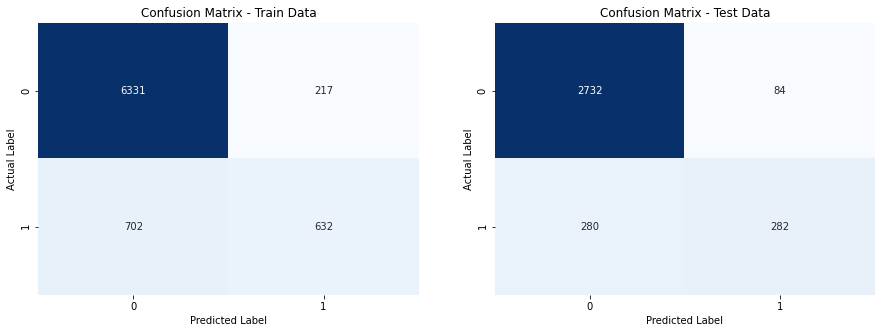

In [62]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_train,lr_train_predict),annot=True, fmt='d', cbar=False,cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Train Data');

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test,lr_test_predict),annot=True, fmt='d', cbar=False,cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Test Data');

In [63]:
print("                    ***Train Data***\n")
print(classification_report(y_train, lr_train_predict))
print("                    ***Test Data***\n")
print(classification_report(y_test, lr_test_predict))

                    ***Train Data***

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      6548
           1       0.74      0.47      0.58      1334

    accuracy                           0.88      7882
   macro avg       0.82      0.72      0.76      7882
weighted avg       0.87      0.88      0.87      7882

                    ***Test Data***

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2816
           1       0.77      0.50      0.61       562

    accuracy                           0.89      3378
   macro avg       0.84      0.74      0.77      3378
weighted avg       0.88      0.89      0.88      3378



In [64]:
## Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_model = LinearDiscriminantAnalysis()

In [65]:
# Fitting the LR Model with Train set
lda_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [66]:
# Predicting on Train and Test
lda_train_predict = lda_model.predict(X_train)
lda_test_predict = lda_model.predict(X_test)

In [67]:
# Feature Importance
pd.DataFrame(lda_model.coef_[0], X_train.columns, columns=['Coefficients']).sort_values(by='Coefficients', ascending = False)

,Coefficients
Complain_l12m,1.909802
account_segment_Regular,0.972582
Marital_Status_Single,0.909184
account_segment_Super Plus,0.373080
Account_user_count,0.370690
City_Tier,0.315941
CC_Agent_Score,0.278610
Gender_Male,0.246941
rev_per_month,0.143484
coupon_used_l12m,0.084422


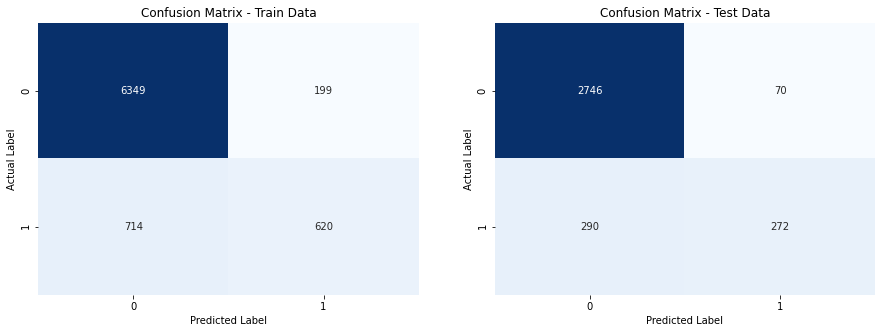

In [68]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_train,lda_train_predict),annot=True, fmt='d', cbar=False,cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Train Data');

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test,lda_test_predict),annot=True, fmt='d', cbar=False,cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Test Data');

In [69]:
print("                    ***Train Data***\n")
print(classification_report(y_train, lda_train_predict))
print("                    ***Test Data***\n")
print(classification_report(y_test, lda_test_predict))

                    ***Train Data***

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      6548
           1       0.76      0.46      0.58      1334

    accuracy                           0.88      7882
   macro avg       0.83      0.72      0.75      7882
weighted avg       0.87      0.88      0.87      7882

                    ***Test Data***

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2816
           1       0.80      0.48      0.60       562

    accuracy                           0.89      3378
   macro avg       0.85      0.73      0.77      3378
weighted avg       0.89      0.89      0.88      3378



In [70]:
## Naive Bayes
from sklearn.naive_bayes import GaussianNB
diab_model = GaussianNB()

In [71]:
# Fitting the LR Model with Train set
diab_model.fit(X_train, y_train)

GaussianNB()

In [72]:
# Predicting on Train and Test
diab_train_predict = diab_model.predict(X_train)
diab_test_predict = diab_model.predict(X_test)

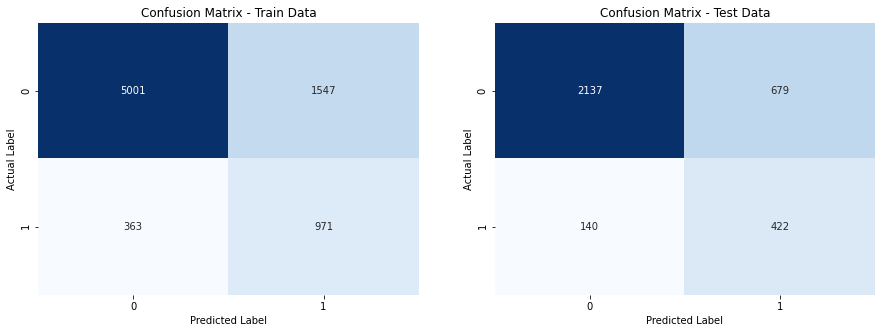

In [73]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_train,diab_train_predict),annot=True, fmt='d', cbar=False,cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Train Data');

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test,diab_test_predict),annot=True, fmt='d', cbar=False,cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Test Data');

In [74]:
print("                    ***Train Data***\n")
print(classification_report(y_train, diab_train_predict))
print("                    ***Test Data***\n")
print(classification_report(y_test, diab_test_predict))

                    ***Train Data***

              precision    recall  f1-score   support

           0       0.93      0.76      0.84      6548
           1       0.39      0.73      0.50      1334

    accuracy                           0.76      7882
   macro avg       0.66      0.75      0.67      7882
weighted avg       0.84      0.76      0.78      7882

                    ***Test Data***

              precision    recall  f1-score   support

           0       0.94      0.76      0.84      2816
           1       0.38      0.75      0.51       562

    accuracy                           0.76      3378
   macro avg       0.66      0.75      0.67      3378
weighted avg       0.85      0.76      0.78      3378



In [75]:
# kNN
from sklearn.neighbors import KNeighborsClassifier

In [76]:
from scipy.stats import zscore
X_train_scaled = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)

In [77]:
X_train_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,7882.0,1.408555e-18,1.000063,-1.153121,-0.927189,-0.136428,0.654334,3.026617
City_Tier,7882.0,1.370186e-15,1.000063,-0.718977,-0.718977,-0.718977,1.460209,1.460209
CC_Contacted_L12m,7882.0,8.636203e-17,1.000063,-1.625031,-0.805677,-0.220424,0.598930,2.705840
Service_Score,7882.0,-2.758514e-16,1.000063,-4.016404,-1.260240,0.117842,0.117842,2.874005
Account_user_count,7882.0,-4.962621e-16,1.000063,-2.680008,-0.698132,0.292806,0.292806,2.274682
CC_Agent_Score,7882.0,-2.566387e-17,1.000063,-1.510126,-0.783236,-0.056347,0.670542,1.397431
rev_per_month,7882.0,-1.002539e-17,1.000063,-1.473879,-0.782611,-0.091342,0.599927,2.673733
Complain_l12m,7882.0,-3.419971e-17,1.000063,-0.613815,-0.613815,-0.613815,1.629156,1.629156
rev_growth_yoy,7882.0,-1.607443e-16,1.000063,-3.252193,-0.856736,-0.324412,0.740235,3.135692
coupon_used_l12m,7882.0,7.328007e-18,1.000063,-0.907751,-0.412911,-0.412911,0.081929,7.009691


In [78]:
kNN_model = KNeighborsClassifier()

In [79]:
# Call Nearest Neighbour algorithm
kNN_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [80]:
kNN_train_predict = diab_model.predict(X_train_scaled)
kNN_test_predict = diab_model.predict(X_test_scaled)

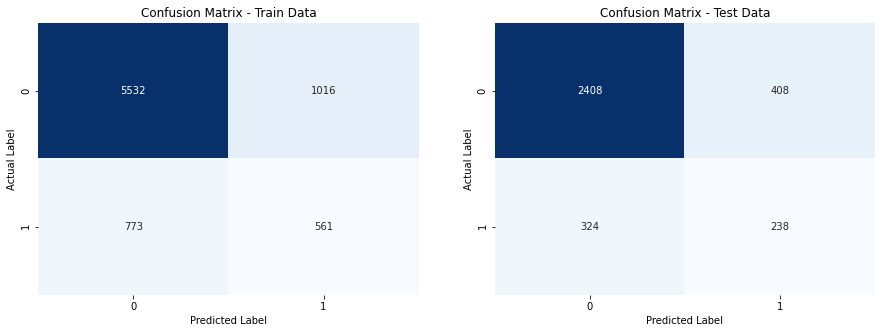

In [81]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_train,kNN_train_predict),annot=True, fmt='d', cbar=False,cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Train Data');

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test,kNN_test_predict),annot=True, fmt='d', cbar=False,cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Test Data');

In [82]:
print("                    ***Train Data***\n")
print(classification_report(y_train, kNN_train_predict))
print("                    ***Test Data***\n")
print(classification_report(y_test, kNN_test_predict))

                    ***Train Data***

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      6548
           1       0.36      0.42      0.39      1334

    accuracy                           0.77      7882
   macro avg       0.62      0.63      0.62      7882
weighted avg       0.79      0.77      0.78      7882

                    ***Test Data***

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      2816
           1       0.37      0.42      0.39       562

    accuracy                           0.78      3378
   macro avg       0.62      0.64      0.63      3378
weighted avg       0.80      0.78      0.79      3378



In [83]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

In [84]:
rf_model = RandomForestClassifier()

In [85]:
# Call RF
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [86]:
rf_train_predict = rf_model.predict(X_train)
rf_test_predict = rf_model.predict(X_test)

In [87]:
# Feature Importance
x = pd.DataFrame(rf_model.feature_importances_*100, X_train.columns, columns=['Importance']).sort_values(by='Importance', ascending = False)
x

,Importance
Tenure,23.858828
cashback_l12m,8.285830
Day_Since_CC_connect,7.155548
CC_Contacted_L12m,6.910802
rev_growth_yoy,6.096444
Complain_l12m,5.888712
rev_per_month,5.562346
CC_Agent_Score,5.397855
Account_user_count,3.951140
coupon_used_l12m,3.733409


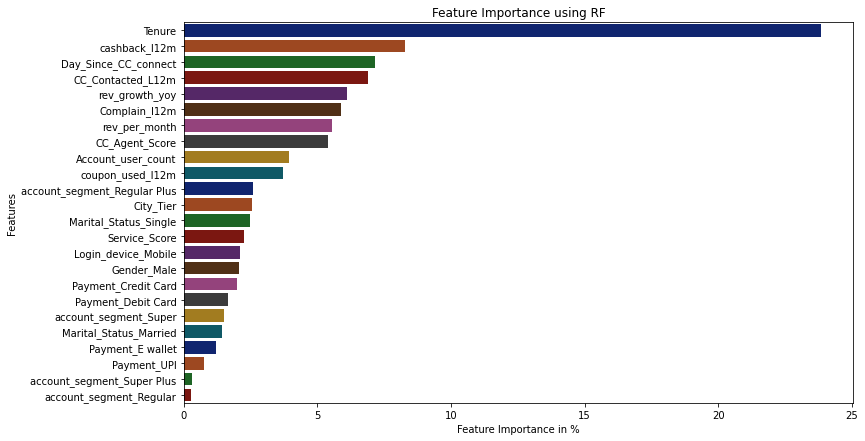

In [88]:
plt.figure(figsize=(12,7))
sns.barplot(x["Importance"],x.index,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using RF')
plt.show()

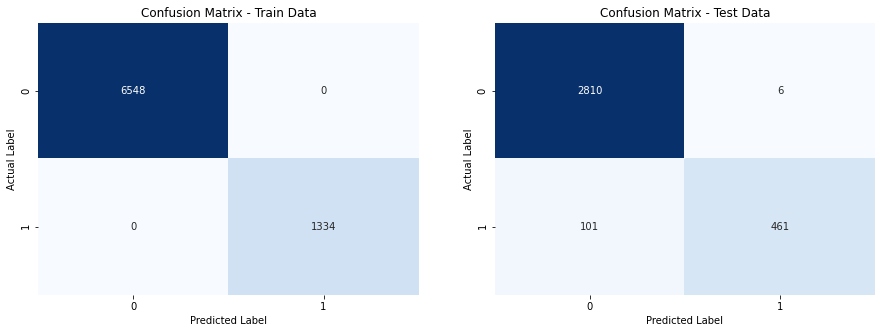

In [89]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_train,rf_train_predict),annot=True, fmt='d', cbar=False,cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Train Data');

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test,rf_test_predict),annot=True, fmt='d', cbar=False,cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Test Data');

In [90]:
print("                    ***Train Data***\n")
print(classification_report(y_train, rf_train_predict))
print("                    ***Test Data***\n")
print(classification_report(y_test, rf_test_predict))

                    ***Train Data***

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6548
           1       1.00      1.00      1.00      1334

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882

                    ***Test Data***

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2816
           1       0.99      0.82      0.90       562

    accuracy                           0.97      3378
   macro avg       0.98      0.91      0.94      3378
weighted avg       0.97      0.97      0.97      3378



In [91]:
## Artificial Neural Network
from sklearn.neural_network import MLPClassifier

In [92]:
ann_model = MLPClassifier()

In [93]:
# Call ANN
ann_model.fit(X_train_scaled, y_train)

MLPClassifier()

In [94]:
ann_train_predict = ann_model.predict(X_train_scaled)
ann_test_predict = ann_model.predict(X_test_scaled)

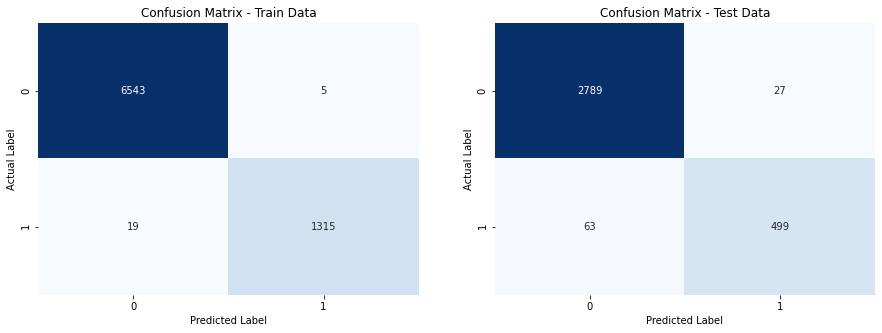

In [95]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_train,ann_train_predict),annot=True, fmt='d', cbar=False,cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Train Data');

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test,ann_test_predict),annot=True, fmt='d', cbar=False,cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Test Data');

In [96]:
print("                    ***Train Data***\n")
print(classification_report(y_train, ann_train_predict))
print("                    ***Test Data***\n")
print(classification_report(y_test, ann_test_predict))

                    ***Train Data***

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6548
           1       1.00      0.99      0.99      1334

    accuracy                           1.00      7882
   macro avg       1.00      0.99      0.99      7882
weighted avg       1.00      1.00      1.00      7882

                    ***Test Data***

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2816
           1       0.95      0.89      0.92       562

    accuracy                           0.97      3378
   macro avg       0.96      0.94      0.95      3378
weighted avg       0.97      0.97      0.97      3378



##### 

#### b. Test your predictive model against the test set using various appropriate performance metrics

##### ROC Curve / ROC AUC Score

In [97]:
from sklearn.metrics import roc_curve,roc_auc_score

In [98]:
model_names={lr_model:'Logistic Regression'
              ,lda_model:'Linear Discriminant Analysis'
              ,diab_model:'Naive Bayes'
              ,kNN_model:'KNN Model'
              ,rf_model:'Random Forest'
              ,ann_model:'ANN Model'
            }

In [99]:
print('[Logistic Regression] Model	',roc_auc_score(y_test,lr_model.predict_proba(X_test)[:,1]))
print('[Linear Discriminant Analysis] Model	',roc_auc_score(y_test,lda_model.predict_proba(X_test)[:,1]))
print('[Naive Bayes] Model	',roc_auc_score(y_test,diab_model.predict_proba(X_test)[:,1]))
print('[kNN] Model	',roc_auc_score(y_test,kNN_model.predict_proba(X_test_scaled)[:,1]))
print('[Random Forest] Model	',roc_auc_score(y_test,rf_model.predict_proba(X_test)[:,1]))
print('[ANN] Model	',roc_auc_score(y_test,ann_model.predict_proba(X_test_scaled)[:,1]))

[Logistic Regression] Model	 0.8764166632966678
[Linear Discriminant Analysis] Model	 0.8758321791087026
[Naive Bayes] Model	 0.8250326047395665
[kNN] Model	 0.9822556919281786
[Random Forest] Model	 0.9930844462754772
[ANN] Model	 0.9882932556211582


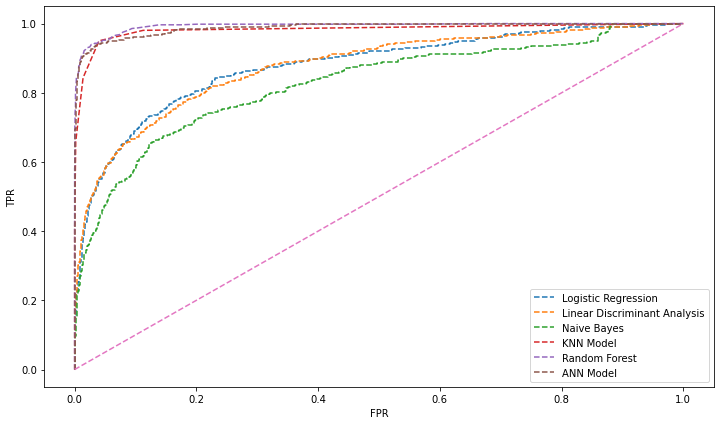

In [100]:
plt.figure(figsize=(12,7))
fpr, tpr, thresholds = roc_curve(y_test, lr_model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, linestyle='--') 

fpr, tpr, thresholds = roc_curve(y_test, lda_model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, linestyle='--') 

fpr, tpr, thresholds = roc_curve(y_test, diab_model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, linestyle='--') 

fpr, tpr, thresholds = roc_curve(y_test, kNN_model.predict_proba(X_test_scaled)[:,1])
plt.plot(fpr, tpr, linestyle='--') 

fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, linestyle='--') 

fpr, tpr, thresholds = roc_curve(y_test, ann_model.predict_proba(X_test_scaled)[:,1])
plt.plot(fpr, tpr, linestyle='--') 

plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(model_names.values())
plt.show()

### 2.2 Model Tuning and business implication

Random Forest has been best model so far. Hence we'll be trying to tune it further...

#### a.Ensemble modelling, wherever applicable

In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
X_train.columns

Index(['Tenure', 'City_Tier', 'CC_Contacted_L12m', 'Service_Score',
       'Account_user_count', 'CC_Agent_Score', 'rev_per_month',
       'Complain_l12m', 'rev_growth_yoy', 'coupon_used_l12m',
       'Day_Since_CC_connect', 'cashback_l12m', 'Login_device_Mobile',
       'Gender_Male', 'Payment_Credit Card', 'Payment_Debit Card',
       'Payment_E wallet', 'Payment_UPI', 'account_segment_Regular',
       'account_segment_Regular Plus', 'account_segment_Super',
       'account_segment_Super Plus', 'Marital_Status_Married',
       'Marital_Status_Single'],
      dtype='object')

In [115]:
param_grid = {
    'min_samples_split': [10,20,30],
    'max_depth': [15,20],
    'max_features': [7, 8, 9],
    'n_estimators': [100, 200, 300]
}

rfcl = RandomForestClassifier(random_state = 123)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [116]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=123),
             param_grid={'max_depth': [15], 'max_features': [8],
                         'min_samples_split': [10], 'n_estimators': [200]})

In [117]:
grid_search.best_params_

{'max_depth': 15,
 'max_features': 8,
 'min_samples_split': 10,
 'n_estimators': 200}

In [118]:
best_rfcl = grid_search.best_estimator_

In [119]:
rfcl_train_predict = best_rfcl.predict(X_train)
rfcl_test_predict = best_rfcl.predict(X_test)

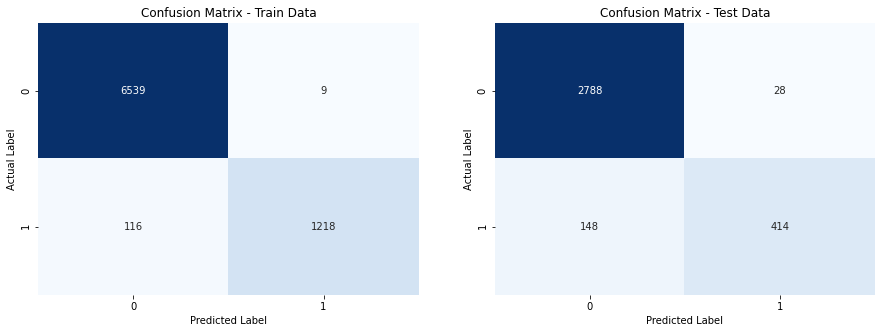

In [158]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_train,rfcl_train_predict),annot=True, fmt='d', cbar=False,cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Train Data');

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test,rfcl_test_predict),annot=True, fmt='d', cbar=False,cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Test Data');

In [120]:
print("                    ***Train Data***\n")
print(classification_report(y_train, rfcl_train_predict))
print("                    ***Test Data***\n")
print(classification_report(y_test, rfcl_test_predict))

                    ***Train Data***

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6548
           1       0.99      0.91      0.95      1334

    accuracy                           0.98      7882
   macro avg       0.99      0.96      0.97      7882
weighted avg       0.98      0.98      0.98      7882

                    ***Test Data***

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2816
           1       0.94      0.74      0.82       562

    accuracy                           0.95      3378
   macro avg       0.94      0.86      0.90      3378
weighted avg       0.95      0.95      0.95      3378



In [121]:
## SMOTE
from imblearn.over_sampling import SMOTE

In [123]:
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [128]:
print(sum(y_train_res==0))
print(sum(y_train_res==1))

6548

In [124]:
rf_smote = RandomForestClassifier(max_depth =  15, max_features = 8, min_samples_split = 10, n_estimators = 200, random_state = 2)

In [129]:
rf_smote_model = rf_smote.fit(X_train_res, y_train_res)

In [130]:
rfcl_sm_train_predict = rf_smote_model.predict(X_train)
rfcl_sm_test_predict = rf_smote_model.predict(X_test)

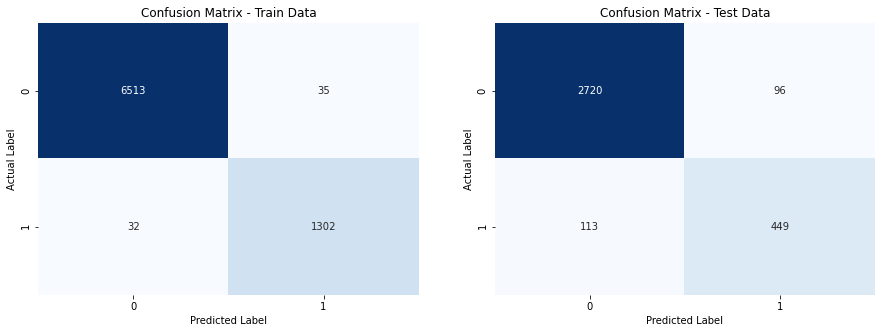

In [159]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_train,rfcl_sm_train_predict),annot=True, fmt='d', cbar=False,cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Train Data');

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test,rfcl_sm_test_predict),annot=True, fmt='d', cbar=False,cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Test Data');

In [131]:
print("                    ***Train Data***\n")
print(classification_report(y_train, rfcl_sm_train_predict))
print("                    ***Test Data***\n")
print(classification_report(y_test, rfcl_sm_test_predict))

                    ***Train Data***

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      6548
           1       0.97      0.98      0.97      1334

    accuracy                           0.99      7882
   macro avg       0.98      0.99      0.98      7882
weighted avg       0.99      0.99      0.99      7882

                    ***Test Data***

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2816
           1       0.82      0.80      0.81       562

    accuracy                           0.94      3378
   macro avg       0.89      0.88      0.89      3378
weighted avg       0.94      0.94      0.94      3378



##### Boosting

In [132]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [134]:
## AdaBoosting
abc_model = AdaBoostClassifier(base_estimator =  best_rfcl, learning_rate = 0.1, random_state=1)

In [135]:
abc_model.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=15,
                                                         max_features=8,
                                                         min_samples_split=10,
                                                         n_estimators=200,
                                                         random_state=123),
                   learning_rate=0.1, random_state=1)

In [136]:
imp_df = pd.DataFrame(abc_model.feature_importances_*100, X_train.columns, columns=['Importance']).sort_values(by='Importance', ascending = False)

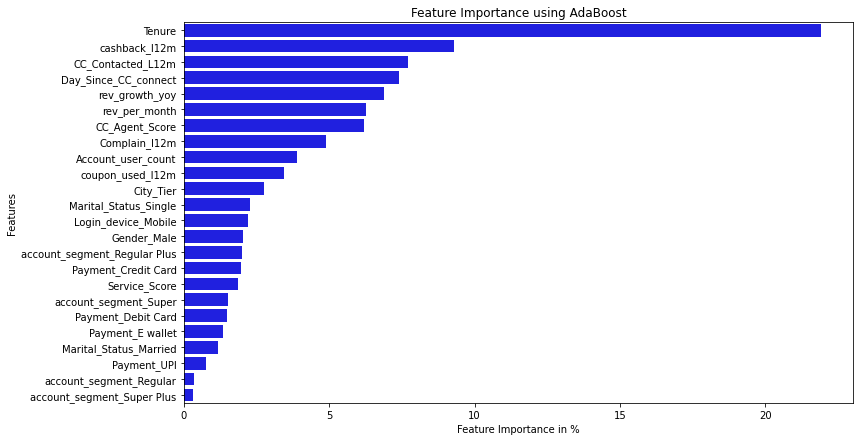

In [137]:
plt.figure(figsize=(12,7))
sns.barplot(imp_df["Importance"],imp_df.index,color='blue')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using AdaBoost')
plt.show()

In [138]:
abc_train_predict = abc_model.predict(X_train)
abc_test_predict = abc_model.predict(X_test)

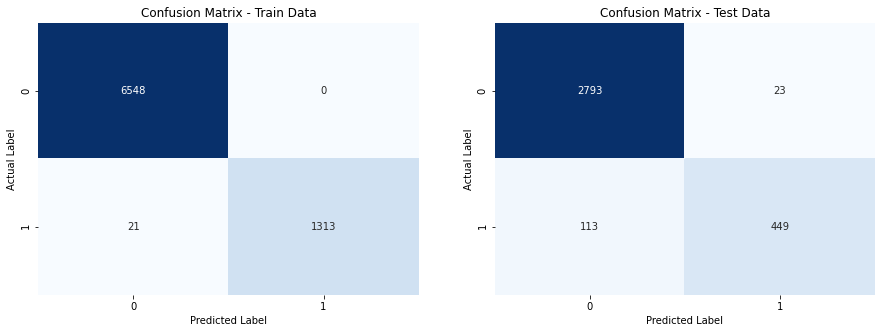

In [160]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_train,abc_train_predict),annot=True, fmt='d', cbar=False,cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Train Data');

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test,abc_test_predict),annot=True, fmt='d', cbar=False,cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Test Data');

In [142]:
print("                    ***Train Data***\n")
print(classification_report(y_train, abc_train_predict, digits=3))
print("                    ***Test Data***\n")
print(classification_report(y_test, abc_test_predict, digits=3))

                    ***Train Data***

              precision    recall  f1-score   support

           0      0.997     1.000     0.998      6548
           1      1.000     0.984     0.992      1334

    accuracy                          0.997      7882
   macro avg      0.998     0.992     0.995      7882
weighted avg      0.997     0.997     0.997      7882

                    ***Test Data***

              precision    recall  f1-score   support

           0      0.961     0.992     0.976      2816
           1      0.951     0.799     0.868       562

    accuracy                          0.960      3378
   macro avg      0.956     0.895     0.922      3378
weighted avg      0.959     0.960     0.958      3378



In [145]:
## Gradient Boost
gbc_model = GradientBoostingClassifier(init= best_rfcl,random_state=1)

In [146]:
gbc_model.fit(X_train, y_train)

GradientBoostingClassifier(init=RandomForestClassifier(max_depth=15,
                                                       max_features=8,
                                                       min_samples_split=10,
                                                       n_estimators=200,
                                                       random_state=123),
                           random_state=1)

In [147]:
imp_df = pd.DataFrame(gbc_model.feature_importances_*100, X_train.columns, columns=['Importance']).sort_values(by='Importance', ascending = False)

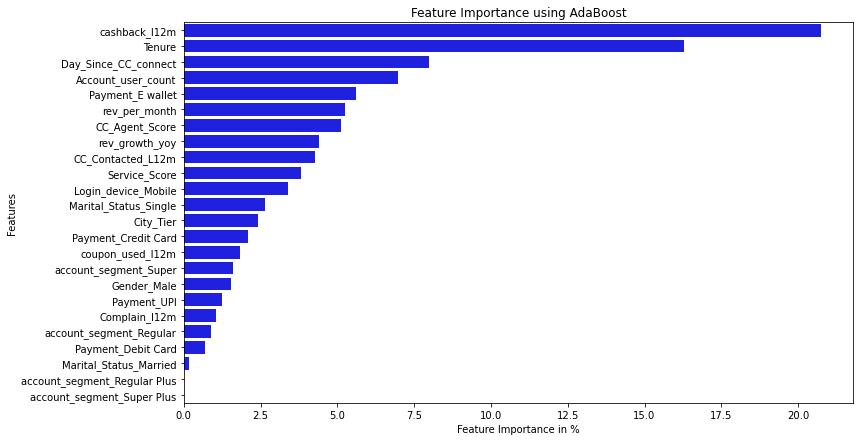

In [148]:
plt.figure(figsize=(12,7))
sns.barplot(imp_df["Importance"],imp_df.index,color='blue')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using AdaBoost')
plt.show()

In [149]:
gbc_train_predict = gbc_model.predict(X_train)
gbc_test_predict = gbc_model.predict(X_test)

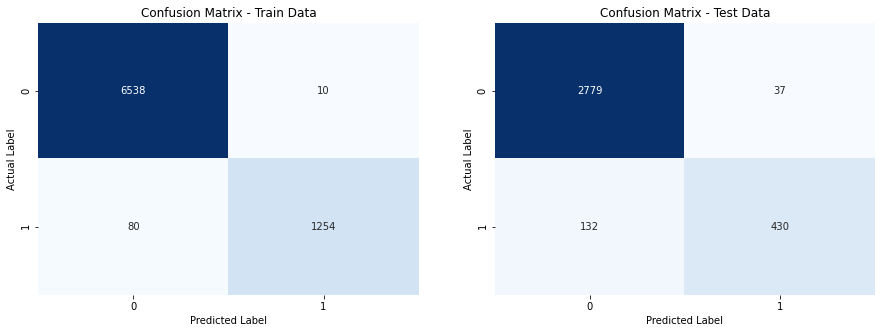

In [161]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_train,gbc_train_predict),annot=True, fmt='d', cbar=False,cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Train Data');

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test,gbc_test_predict),annot=True, fmt='d', cbar=False,cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Test Data');

In [150]:
print("                    ***Train Data***\n")
print(classification_report(y_train, gbc_train_predict, digits=3))
print("                    ***Test Data***\n")
print(classification_report(y_test, gbc_test_predict, digits=3))

                    ***Train Data***

              precision    recall  f1-score   support

           0      0.988     0.998     0.993      6548
           1      0.992     0.940     0.965      1334

    accuracy                          0.989      7882
   macro avg      0.990     0.969     0.979      7882
weighted avg      0.989     0.989     0.988      7882

                    ***Test Data***

              precision    recall  f1-score   support

           0      0.955     0.987     0.970      2816
           1      0.921     0.765     0.836       562

    accuracy                          0.950      3378
   macro avg      0.938     0.876     0.903      3378
weighted avg      0.949     0.950     0.948      3378



In [151]:
# XGBoost
xgb_model = XGBClassifier(random_state=1)

In [152]:
xgb_model.fit(X_train, y_train)

[14:57:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [153]:
imp_df = pd.DataFrame(xgb_model.feature_importances_*100, X_train.columns, columns=['Importance']).sort_values(by='Importance', ascending = False)

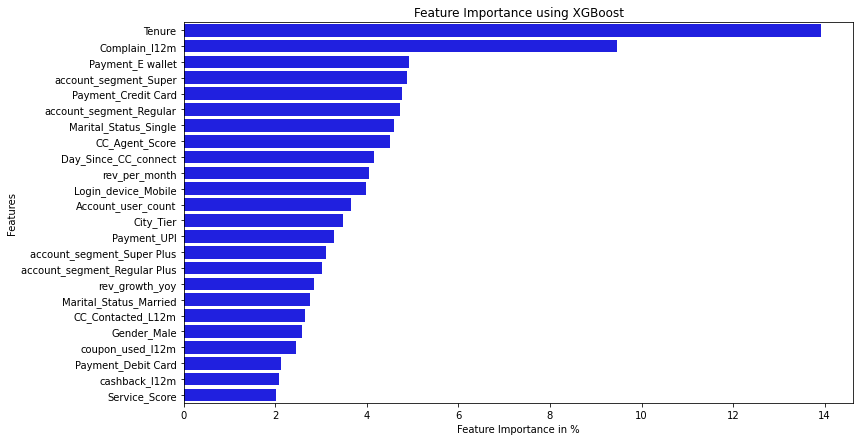

In [154]:
plt.figure(figsize=(12,7))
sns.barplot(imp_df["Importance"],imp_df.index,color='blue')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using XGBoost')
plt.show()

In [155]:
xgb_train_predict = xgb_model.predict(X_train)
xgb_test_predict = xgb_model.predict(X_test)

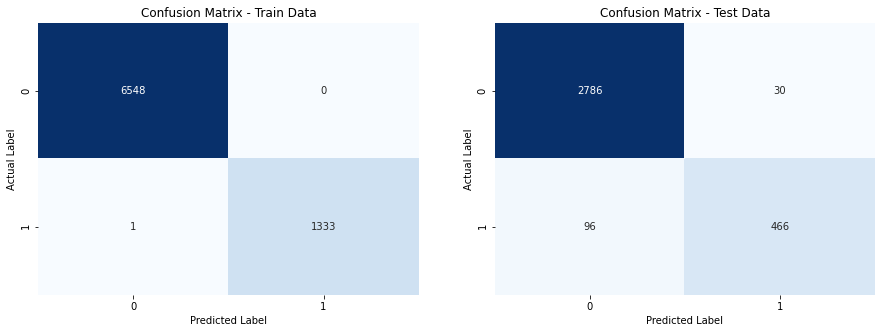

In [162]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_train,xgb_train_predict),annot=True, fmt='d', cbar=False,cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Train Data');

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test,xgb_test_predict),annot=True, fmt='d', cbar=False,cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Test Data');

In [157]:
print("                    ***Train Data***\n")
print(classification_report(y_train, xgb_train_predict, digits=4))
print("                    ***Test Data***\n")
print(classification_report(y_test, xgb_test_predict, digits=4))

                    ***Train Data***

              precision    recall  f1-score   support

           0     0.9998    1.0000    0.9999      6548
           1     1.0000    0.9993    0.9996      1334

    accuracy                         0.9999      7882
   macro avg     0.9999    0.9996    0.9998      7882
weighted avg     0.9999    0.9999    0.9999      7882

                    ***Test Data***

              precision    recall  f1-score   support

           0     0.9667    0.9893    0.9779      2816
           1     0.9395    0.8292    0.8809       562

    accuracy                         0.9627      3378
   macro avg     0.9531    0.9093    0.9294      3378
weighted avg     0.9622    0.9627    0.9618      3378

